<a href="https://colab.research.google.com/github/jtoyhh/Stock_Price_Prediction/blob/main/Stochastic_RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description : THis program uses the Stochastic Relative Strength Index (stochRSI) indicator and python to determine if an asset is over bought or over sold

In [ ]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#read the file
df = pd.read_csv('./data/AAPL.csv')
#set the date as the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2020-11-05,2020-11-05,117.949997,119.620003,116.870003,119.029999,118.269310,126387100
2020-11-06,2020-11-06,118.320000,119.199997,116.129997,118.690002,118.134949,114457900
2020-11-09,2020-11-09,120.500000,121.989998,116.050003,116.320000,115.776031,154515300
2020-11-10,2020-11-10,115.550003,117.589996,114.129997,115.970001,115.427666,138023400
2020-11-11,2020-11-11,117.190002,119.629997,116.440002,119.489998,118.931198,112295000
...,...,...,...,...,...,...,...
2021-10-29,2021-10-29,147.220001,149.940002,146.410004,149.800003,149.800003,124850400
2021-11-01,2021-11-01,148.990005,149.699997,147.800003,148.960007,148.960007,74588300
2021-11-02,2021-11-02,148.660004,151.570007,148.649994,150.020004,150.020004,69122000
2021-11-03,2021-11-03,150.389999,151.970001,149.820007,151.490005,151.490005,54511500


In [ ]:
#Create a Exponential Moving Average indicator function
def EMA(data, period=20, column='Close'):
    return data[column].ewm(span=period, adjust=False).mean()

In [ ]:
#Create a function to calculate the Stochastic Relative Strength Index
def StochRSI(data, period=14, column='Close'):
    delta = data[column].diff(1)
    delta = delta.dropna()
    up = delta.copy()
    down = delta.copy()
    up[up<0] = 0
    down[down>0] = 0
    data['up'] = up
    data['down'] = down
    AVG_Gain = EMA(data, period, column='up')
    AVG_Loss = abs( EMA(data, period, column='down') )
    RS = AVG_Gain / AVG_Loss
    RSI = 100.0 - (100.0/(1.0 + RS))

    stockrsi = (RSI - RSI.rolling(period).min()) / (RSI.rolling(period).max() - RSI.rolling(period).min())

    return stockrsi

In [ ]:
#Storre the stochastic RSI data in a new column
df['StochRSI'] = StochRSI(df)

(array([18567., 18628., 18687., 18748., 18809., 18871., 18932.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

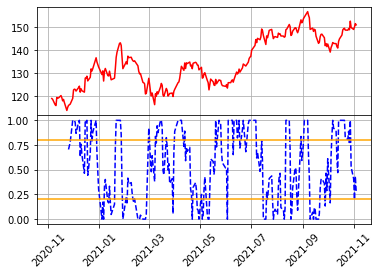

In [ ]:
#plot the data
#create a figure and set of subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
#Remove the vertical gap between the subplots
plt.subplots_adjust(hspace=.0)
#Set grid lines
ax1.grid()
ax2.grid()
#Plot the close price
ax1.plot(df.index, df['Close'], color = 'r')
#Plot the StochRSI
ax2.plot(df.index, df['StochRSI'], color = 'b', linestyle='--')
#Plot the oversold(0.2) and overbought (0.8) lines
ax2.axhline(0.20, color='orange')
ax2.axhline(0.80, color='orange')
#Rotate the xticks by 45 degrees
plt.xticks(rotation=45)